In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [2]:
# Reading the csv file

train = pd.read_csv(r"C:\Users\Lavanya\Downloads\Project-Housing\Project-Housing_splitted\train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
# reading the test file

test = pd.read_csv(r"C:\Users\Lavanya\Downloads\Project-Housing\Project-Housing_splitted\test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4]:
# Looking at the columns in the dataset

train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# Number of entries in the dataset

train.shape

(1168, 81)

The dataset has both numerical and categorical data.

The target variable is SalePrice.

There are 1168 entries with 81 features.

In [6]:
test.shape

(292, 80)

There are 292 entries in the test dataset

In [7]:
# Set id column is set as index

train.set_index('Id',inplace=True)
test.set_index('Id',inplace=True)

In [8]:
# datatypes of the columns

obj = train.dtypes
for key,value in obj.iteritems():
    print(key,",",value)

MSSubClass , int64
MSZoning , object
LotFrontage , float64
LotArea , int64
Street , object
Alley , object
LotShape , object
LandContour , object
Utilities , object
LotConfig , object
LandSlope , object
Neighborhood , object
Condition1 , object
Condition2 , object
BldgType , object
HouseStyle , object
OverallQual , int64
OverallCond , int64
YearBuilt , int64
YearRemodAdd , int64
RoofStyle , object
RoofMatl , object
Exterior1st , object
Exterior2nd , object
MasVnrType , object
MasVnrArea , float64
ExterQual , object
ExterCond , object
Foundation , object
BsmtQual , object
BsmtCond , object
BsmtExposure , object
BsmtFinType1 , object
BsmtFinSF1 , int64
BsmtFinType2 , object
BsmtFinSF2 , int64
BsmtUnfSF , int64
TotalBsmtSF , int64
Heating , object
HeatingQC , object
CentralAir , object
Electrical , object
1stFlrSF , int64
2ndFlrSF , int64
LowQualFinSF , int64
GrLivArea , int64
BsmtFullBath , int64
BsmtHalfBath , int64
FullBath , int64
HalfBath , int64
BedroomAbvGr , int64
KitchenAbvGr , in

There are no columns that have been assigned incorrect datatypes.

In [9]:
# The different classes in each column

for i in train.columns:
    if train[i].dtypes == 'object':
        print(train[i].value_counts())
        print("\n")

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Pave    1164
Grvl       4
Name: Street, dtype: int64


Grvl    41
Pave    36
Name: Alley, dtype: int64


Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


AllPub    1168
Name: Utilities, dtype: int64


Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64




The above output provides us with information regarding unique categories in every feature along with their counts, This helps us in understanding the market.

For example out of the 1168 entries 928 of them are in low density residential zone which indicates that it is the most sold one.

Hence we can deduce the demand for specific type of houses on the basis of their selling count.

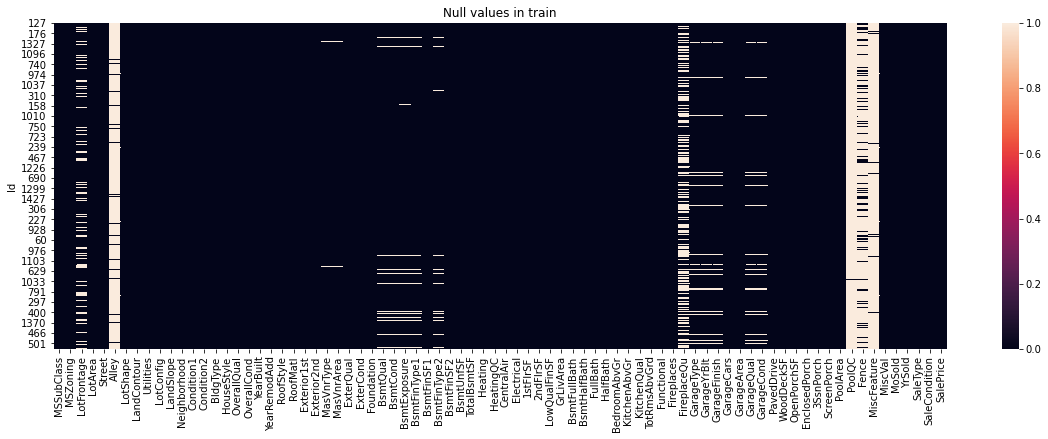

In [10]:
# Null values in training set

plt.figure(figsize=(20,6))
plt.title("Null values in train")
sns.heatmap(train.isnull())
plt.show()

In [11]:
# Percentage of missing values in each column

obj = train.isnull().sum() * 100 / len(train)
for key,value in obj.iteritems():
    print(key,",",value)

MSSubClass , 0.0
MSZoning , 0.0
LotFrontage , 18.32191780821918
LotArea , 0.0
Street , 0.0
Alley , 93.40753424657534
LotShape , 0.0
LandContour , 0.0
Utilities , 0.0
LotConfig , 0.0
LandSlope , 0.0
Neighborhood , 0.0
Condition1 , 0.0
Condition2 , 0.0
BldgType , 0.0
HouseStyle , 0.0
OverallQual , 0.0
OverallCond , 0.0
YearBuilt , 0.0
YearRemodAdd , 0.0
RoofStyle , 0.0
RoofMatl , 0.0
Exterior1st , 0.0
Exterior2nd , 0.0
MasVnrType , 0.5993150684931506
MasVnrArea , 0.5993150684931506
ExterQual , 0.0
ExterCond , 0.0
Foundation , 0.0
BsmtQual , 2.5684931506849313
BsmtCond , 2.5684931506849313
BsmtExposure , 2.654109589041096
BsmtFinType1 , 2.5684931506849313
BsmtFinSF1 , 0.0
BsmtFinType2 , 2.654109589041096
BsmtFinSF2 , 0.0
BsmtUnfSF , 0.0
TotalBsmtSF , 0.0
Heating , 0.0
HeatingQC , 0.0
CentralAir , 0.0
Electrical , 0.0
1stFlrSF , 0.0
2ndFlrSF , 0.0
LowQualFinSF , 0.0
GrLivArea , 0.0
BsmtFullBath , 0.0
BsmtHalfBath , 0.0
FullBath , 0.0
HalfBath , 0.0
BedroomAbvGr , 0.0
KitchenAbvGr , 0.0
Kit

The columns alley, PoolQC, Fence and MiscFeature have high percentage of missing values.

The NA in these columns and in columns FireplaceQU, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFintype2, MasVnrType represent that the house does not have the particular facility/fuction. Hence, we can replace NA with No facility.

In the other corresponding column MasVnrArea we can replace NA with 0, as no masonry vaneer is nothing but 0 sq feet of masonry vaneer.
Also, GarageYrBlt stands for year built of the garage, for houses with no garage we will impute it with 0. 

For the column LotFrontage, we use imputation using kNN.

In [12]:
# Replacing NA/None with No Facility for certain columns

for i in ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    train[i].replace(np.nan,'No Facility',inplace=True)

In [13]:
# Replacing missing values with 0 in MasVnrArea, GarageYrBlt

for i in ['MasVnrArea','GarageYrBlt']:
    train[i].replace(np.nan,0,inplace=True)

In [14]:
# kNN imputaion for LotFrontage

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
train['LotFrontage'] = imputer.fit_transform(train[['LotFrontage']])

In [15]:
train.isnull().values.any()

False

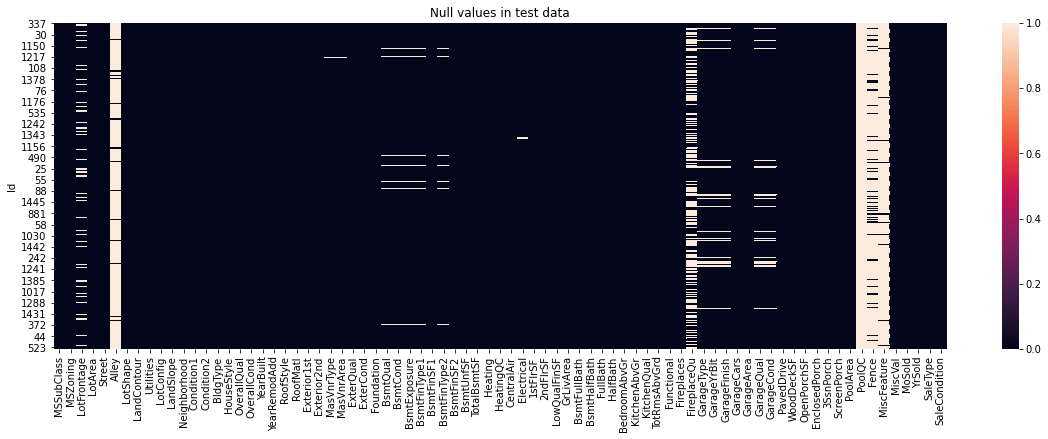

In [16]:
# Checking for null values in testing set

plt.figure(figsize=(20,6))
plt.title("Null values in test data")
sns.heatmap(test.isnull())
plt.show()

In [17]:
# Imputing the null values as in the training set

for i in ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']:
    test[i].replace(np.nan,'No Facility',inplace=True)
    
for i in ['MasVnrArea','GarageYrBlt']:
    test[i].replace(np.nan,0,inplace=True)
    
test['LotFrontage'] = imputer.transform(test[['LotFrontage']])

In [18]:
# In the test set, the Electrical column also has null values - we resolve this by kNN imputation

print(test['Electrical'].mode())
test['Electrical']=test['Electrical'].replace(np.nan,'SBrkr')

0    SBrkr
dtype: object


In [19]:
test.isnull().values.any()

False

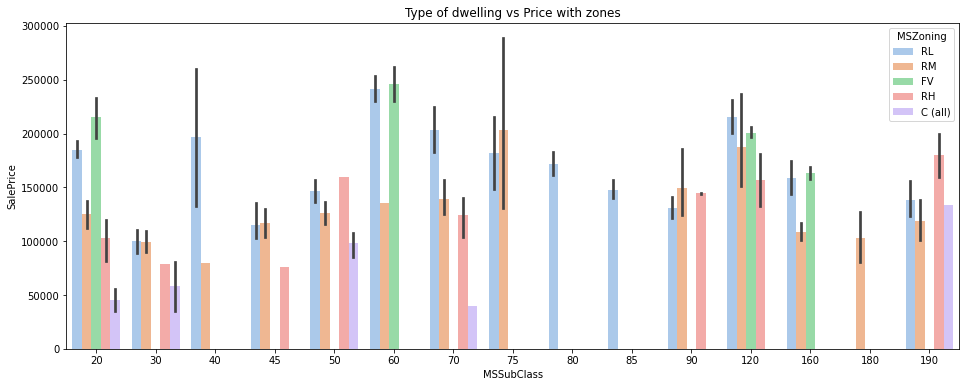

In [20]:
# Analysing price trend in dwellings and zonees

plt.figure(figsize=(16,6))
plt.title("Type of dwelling vs Price with zones")
sns.barplot(train['MSSubClass'],train['SalePrice'],hue=train['MSZoning'],palette='pastel')
plt.show()

Here, we can see varying pricing for different dwellings. We can say that the type has some influence on the sale price.

The 2 story houses and 1 story planned units built in 1946 or later situated in a low density residential zone fetch a higher price.

1 story and 2 story (built in 1946 or later) houses in floating village residential zone are extremely popular.

Any type of dwelling in a residential medium density and high density zone is of average demand and sales.

Commercial spaces especially the ones built on the year 1945 or before do not guarantee a good selling price.

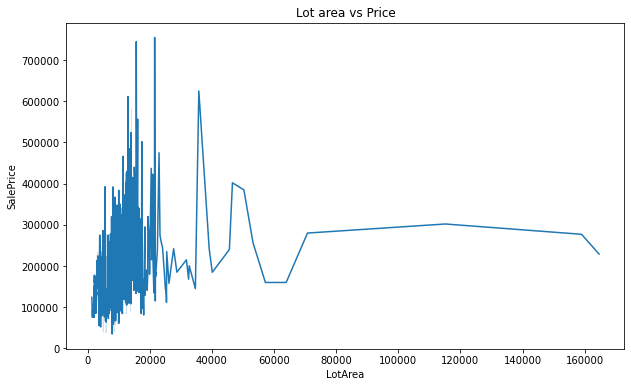

In [21]:
# Lot area and selling price

plt.figure(figsize=(10,6))
plt.title("Lot area vs Price")
sns.lineplot(train['LotArea'],train['SalePrice'])
plt.show()

There is high fluctuation in prices of most houses (under 20000 feet), It does follow a slight increasing trend.

Properties below the 20000 square feet lot area with suitable environment have the best market. 

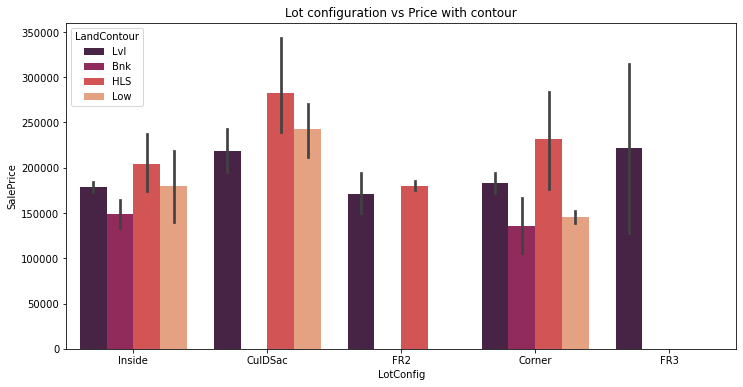

In [22]:
# Lot configuration and selling price

plt.figure(figsize=(12,6))
plt.title("Lot configuration vs Price with contour")
sns.barplot(train['LotConfig'],train['SalePrice'],hue=train['LandContour'],palette='rocket')
plt.show()

Cul de sac is the most poupular lot especially in hillside areas.

Corner and Inside lots also fetch good prices with any contour.

Leveled lots correspond to a good sale in any configuration.

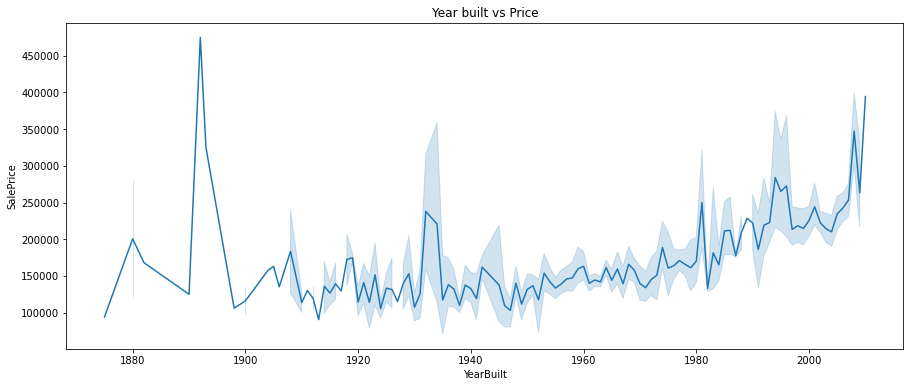

In [23]:
# Year built vs Price

plt.figure(figsize=(15,6))
plt.title("Year built vs Price")
sns.lineplot(train['YearBuilt'],train['SalePrice'])
plt.show()

As we can see newly built properties are sold for a higher price and the houses built earlier than 1940 and later 1900 maintain almost the same price. 

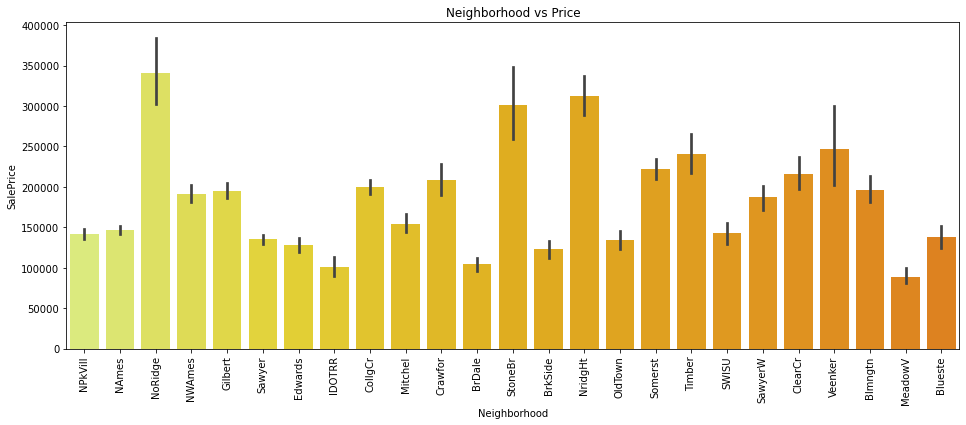

In [24]:
# Neighborhood

plt.figure(figsize=(16,6))
plt.title("Neighborhood vs Price")
sns.barplot(train['Neighborhood'],train['SalePrice'],palette='Wistia')
plt.xticks(rotation = 90)
plt.show()

Northridge, Stone Brook and Northridge heights are expensive neighborhoods with selling price above 300000. 

Iowa Dot and rail road, Briardale and Meadow Villarge fetch low prices, hence expansion in these places is not considered good.

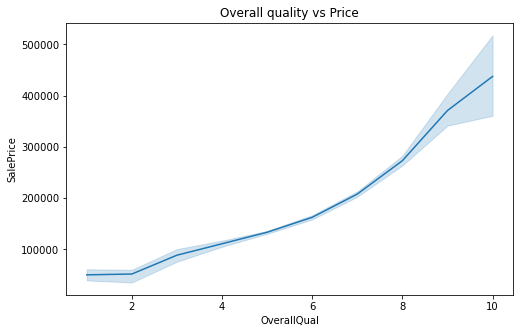

In [25]:
# Overall Quality

plt.figure(figsize=(8,5))
plt.title("Overall quality vs Price")
sns.lineplot(train['OverallQual'],train['SalePrice'])
plt.show()

The price increases with the quality of the property. 

Houses with overall condition 5 and above have a good market.

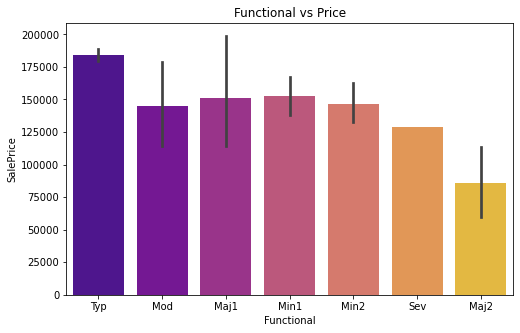

In [26]:
# Functional

plt.figure(figsize=(8,5))
plt.title("Functional vs Price")
sns.barplot(train['Functional'],train['SalePrice'],palette='plasma')
plt.show()

Houses with typical functions are preferred as they gain 175000 and above. Entering the market with majorly functional deducted houses 2 is not adviced.

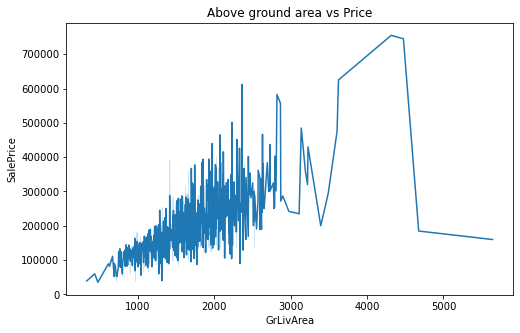

In [27]:
# Above ground living area 

plt.figure(figsize=(8,5))
plt.title("Above ground area vs Price")
sns.lineplot(train['GrLivArea'],train['SalePrice'])
plt.show()

The above the ground living area has high fluctuations, but still shows an increasing trend.

The plot implies that greater the living area above ground, higher will be the selling price.

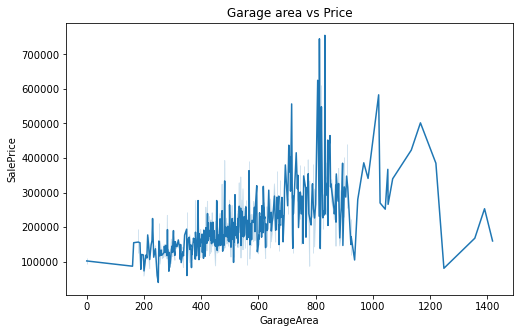

In [28]:
# Garage area

plt.figure(figsize=(8,5))
plt.title("Garage area vs Price")
sns.lineplot(train['GarageArea'],train['SalePrice'])
plt.show()

The garage area has high fluctuations, but still shows an increasing trend.

The plot implies that greater the garage area, higher will be the selling price.

In [29]:
# Correlation of numerical features with the target

train.corrwith(train['SalePrice'])

MSSubClass      -0.060775
LotFrontage      0.323779
LotArea          0.249499
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
BsmtFinSF1       0.362874
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
1stFlrSF         0.587642
2ndFlrSF         0.330386
LowQualFinSF    -0.032381
GrLivArea        0.707300
BsmtFullBath     0.212924
BsmtHalfBath    -0.011109
FullBath         0.554988
HalfBath         0.295592
BedroomAbvGr     0.158281
KitchenAbvGr    -0.132108
TotRmsAbvGrd     0.528363
Fireplaces       0.459611
GarageYrBlt      0.265622
GarageCars       0.628329
GarageArea       0.619000
WoodDeckSF       0.315444
OpenPorchSF      0.339500
EnclosedPorch   -0.115004
3SsnPorch        0.060119
ScreenPorch      0.100284
PoolArea         0.103280
MiscVal         -0.013071
MoSold           0.072764
YrSold          -0.045508
SalePrice        1.000000
dtype: float64

GrLivArea - above ground living area and overall quality has a high positive correlation with the target.

It is followed by GarageArea and GarageCars with above 0.60. Next comes total basement area, total rooms above ground, year built and remodeled.

The target does not show high negative correlation with any column.

In [30]:
# Converting categorical to numerical data

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df1 = train.drop('SalePrice',axis=1)
df2 = test
union = pd.concat([df1,df2])

for i in train.columns:
    if train[i].dtypes == object:
        label_encoder.fit(union[[i]])
        train[i] = label_encoder.transform(train[[i]])
        test[i] = label_encoder.transform(test[[i]])        

In [31]:
# importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [32]:
# Splitting into independent features and target in training set

x = train.drop('SalePrice',axis=1)
y = train[['SalePrice']]

In [33]:
# Standard scalar

sc = StandardScaler()
x = sc.fit_transform(x)
test = sc.transform(test)

In [34]:
# Selectkbest with f test for feature selection

fvalue_Best = SelectKBest(f_classif, k= 43)
X_kbest = fvalue_Best.fit_transform(x, y)
test_kbest = fvalue_Best.transform(test)

In [35]:
# train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_kbest,y,test_size=0.20,random_state=0)
print(" x train shape: ",x_train.shape)
print(" x test shape: ",x_test.shape)

 x train shape:  (934, 43)
 x test shape:  (234, 43)


In [36]:
# training with linear regression and lasso regularization.

model = [Lasso(),LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m)
    print("fit score :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2 score :",r2_score(y_test,predm))
    print("mean absolute error: ",mean_absolute_error(y_test,predm))
    print("root mean squared error :",math.sqrt(mean_squared_error(y_test,predm)))
    print("\n")

Lasso()
fit score : 0.8089856848656878
r2 score : 0.8314231543022824
mean absolute error:  21246.68301780158
root mean squared error : 34214.823302816534


LinearRegression()
fit score : 0.8089858640959093
r2 score : 0.8313748879594237
mean absolute error:  21244.322519261135
root mean squared error : 34219.72108754768


DecisionTreeRegressor()
fit score : 1.0
r2 score : 0.7191565902850603
mean absolute error:  29399.226495726496
root mean squared error : 44161.870348713506


KNeighborsRegressor()
fit score : 0.8416873876192105
r2 score : 0.7610436661231911
mean absolute error:  23609.225641025645
root mean squared error : 40735.64649056701




The r2 score and root mean squared error are almost same for both linear and Lasso. Lasso regularization will help in reducing the dimensions(as the coefficient is made 0), we use gridsearch cv to tune the hyperparameters in Lasso.

In [41]:
# Deciding alpha value

from sklearn.model_selection import GridSearchCV

alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])
g = GridSearchCV(Lasso(),dict(alpha=alphas))
g.fit(X_kbest,y)
g.best_params_

{'alpha': 5.0}

In [42]:
lasso = Lasso(alpha = 5)
lasso.fit(x_train,y_train)
print(lasso)
print("fit score :",lasso.score(x_train,y_train))
pred=lasso.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean absolute error: ",mean_absolute_error(y_test,pred))
print("root mean squared error :",math.sqrt(mean_squared_error(y_test,pred)))
print("Cross_val_score for",lasso ,'is ',cross_val_score(lasso,X_kbest,y,cv=5,scoring='r2').mean())

Lasso(alpha=5)
fit score : 0.8089814162355213
r2 score : 0.8316080327660212
mean absolute error:  21256.063054152964
root mean squared error : 34196.05643357655
Cross_val_score for Lasso(alpha=5) is  0.7629390755688934


 We try ensemble algorithms and see whether we can come up with higher efficiency.

In [43]:
# Random forest regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf)
print("fit score :",rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean absolute error: ",mean_absolute_error(y_test,pred))
print("root mean squared error :",math.sqrt(mean_squared_error(y_test,pred)))
print("Cross_val_score for",rf ,'is ',cross_val_score(rf,X_kbest,y,cv=5,scoring='r2').mean())

RandomForestRegressor()
fit score : 0.976564499454755
r2 score : 0.8799814657704056
mean absolute error:  17741.864786324786
root mean squared error : 28869.51574127849
Cross_val_score for RandomForestRegressor() is  0.8459945210915436


The random forest regressor is clearly working better than Lasso. The model is not overfitted.

In [44]:
# hyperparameter tuning - random forest regressor

p = {'n_estimators':[50,100],'max_depth':[2,4,6,8,10],'random_state':range(0,100)}
a = GridSearchCV(rf,p)
a.fit(X_kbest,y)
a.best_params_

{'max_depth': 10, 'n_estimators': 100, 'random_state': 24}

In [45]:
# Random forest after hyperparameteer tuning

rf = RandomForestRegressor(max_depth = 10, n_estimators = 100, random_state = 24)
rf.fit(x_train,y_train)
print(rf)
print("fit score :",rf.score(x_train,y_train))
pred=rf.predict(x_test)
print("r2 score :",r2_score(y_test,pred))
print("mean absolute error: ",mean_absolute_error(y_test,pred))
print("root mean squared error :",math.sqrt(mean_squared_error(y_test,pred)))
print("Cross_val_score for",rf ,'is ',cross_val_score(rf,X_kbest,y,cv=5,scoring='r2').mean())

RandomForestRegressor(max_depth=10, random_state=24)
fit score : 0.9743747641312945
r2 score : 0.8962627233310411
mean absolute error:  17386.40267289179
root mean squared error : 26840.015428016155
Cross_val_score for RandomForestRegressor(max_depth=10, random_state=24) is  0.8551349515635914


In [46]:
# Saving the model

import joblib
joblib.dump(rf,'housing_rf.pkl')

['housing_rf.pkl']

In [47]:
# Loading the model

joblib_model = joblib.load('housing_rf.pkl')
joblib_model

RandomForestRegressor(max_depth=10, random_state=24)

In [48]:
# Predicting the target

test_y = joblib_model.predict(test_kbest)
test_y

array([346550.74619071, 277788.88514788, 251685.51978176, 170996.68292939,
       203952.15889663,  79794.95941694, 133410.66088604, 319473.79178315,
       239073.93895305, 161761.61156751,  72298.48495495, 151770.15436714,
       125588.74018518, 177405.88092893, 312025.22204732, 123761.7807414 ,
       112127.27078263, 123205.84126186, 171743.81744265, 198502.86229278,
       156932.58665192, 149923.99160276, 152335.90449886,  76861.16008978,
       102037.46033637, 130034.48750413, 178947.14444704, 151575.21377143,
       165075.00063717, 116311.80062932, 151345.50787632, 182413.01930416,
       231430.49004104, 160215.26277004, 111940.21815635, 171753.94139995,
       189545.49830184, 114018.03026804, 159796.27369366, 152167.53247141,
       105597.2212041 , 323948.34130278, 200485.03129223, 182289.19238553,
       133932.00731221, 128920.24148872, 125620.50968634, 103168.88967189,
       206573.80226241, 312443.56645994, 145204.92652441, 183105.77972762,
       108386.52837227,  

In [49]:
predicted_SalePrice = pd.DataFrame(test_y)
predicted_SalePrice.head()

0
0  346550.746191
1  277788.885148
2  251685.519782
3  170996.682929
4  203952.158897